# Film Data Analysis

## Initial Setup

In [1]:
import pandas as pd
import sqlite3 as sql
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
from statsmodels.stats.multicomp import MultiComparison
import pandas as pd


In [2]:
# will be looking at a lot of tables, so make a report
def df_report(df):
    print(df.info())
    print('===========================================================\n')
    print(df.describe())
    print('===========================================================\n')
    print(df.head())

In [3]:
films = pd.read_csv('Data\\Reduced_Data\\films_2010.csv')

In [4]:
films.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63849 entries, 0 to 63848
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         63849 non-null  int64  
 1   primary_title      63849 non-null  object 
 2   year               63849 non-null  float64
 3   runtime_minutes    62741 non-null  float64
 4   genres             62322 non-null  object 
 5   movie_id           62741 non-null  object 
 6   writer             54128 non-null  object 
 7   director           62264 non-null  object 
 8   production_budget  2440 non-null   float64
 9   domestic_gross     4564 non-null   float64
 10  worldwide_gross    3372 non-null   float64
 11  studio             3381 non-null   object 
 12  foreign_gross      3398 non-null   float64
 13  averagerating      62783 non-null  float64
 14  numvotes           62779 non-null  float64
 15  log_numvotes       62115 non-null  float64
 16  actors             627

#### Get rid of what we don't need for the following analyses

In [5]:
drop_columns= ['Unnamed: 0', 'domestic_gross', 'worldwide_gross', 'foreign_gross', 'log_numvotes', 
              'ww_netprofit', 'ww_ppratio', 'f_netprofit', 'f_ppratio']
films = films.drop(drop_columns, axis=1)

In [6]:
films.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63849 entries, 0 to 63848
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   primary_title      63849 non-null  object 
 1   year               63849 non-null  float64
 2   runtime_minutes    62741 non-null  float64
 3   genres             62322 non-null  object 
 4   movie_id           62741 non-null  object 
 5   writer             54128 non-null  object 
 6   director           62264 non-null  object 
 7   production_budget  2440 non-null   float64
 8   studio             3381 non-null   object 
 9   averagerating      62783 non-null  float64
 10  numvotes           62779 non-null  float64
 11  actors             62741 non-null  object 
 12  d_netprofit        2440 non-null   float64
 13  d_ppratio          2440 non-null   float64
dtypes: float64(7), object(7)
memory usage: 6.8+ MB


#### Get rid of the null data in the financial columns

In [7]:
films = films[films.d_netprofit.notna()]

In [8]:
films.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2440 entries, 14 to 63144
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   primary_title      2440 non-null   object 
 1   year               2440 non-null   float64
 2   runtime_minutes    2036 non-null   float64
 3   genres             2035 non-null   object 
 4   movie_id           2036 non-null   object 
 5   writer             1947 non-null   object 
 6   director           2030 non-null   object 
 7   production_budget  2440 non-null   float64
 8   studio             1235 non-null   object 
 9   averagerating      2019 non-null   float64
 10  numvotes           2019 non-null   float64
 11  actors             2036 non-null   object 
 12  d_netprofit        2440 non-null   float64
 13  d_ppratio          2440 non-null   float64
dtypes: float64(7), object(7)
memory usage: 285.9+ KB


In [9]:
df_report(films)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2440 entries, 14 to 63144
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   primary_title      2440 non-null   object 
 1   year               2440 non-null   float64
 2   runtime_minutes    2036 non-null   float64
 3   genres             2035 non-null   object 
 4   movie_id           2036 non-null   object 
 5   writer             1947 non-null   object 
 6   director           2030 non-null   object 
 7   production_budget  2440 non-null   float64
 8   studio             1235 non-null   object 
 9   averagerating      2019 non-null   float64
 10  numvotes           2019 non-null   float64
 11  actors             2036 non-null   object 
 12  d_netprofit        2440 non-null   float64
 13  d_ppratio          2440 non-null   float64
dtypes: float64(7), object(7)
memory usage: 285.9+ KB
None

              year  runtime_minutes  production_budget  average

#### Loop through all the data and capture 'group' for the top 12 distinct genre catagories, such that if a movie contains the genre in its 'genres' field then it will be part of that group.  Note that a movie can belong to multiple groups.

#### Will use these group to perform statistical testing agains the dependent variables further below

In [10]:
genre_groups = ['Documentary', 'Drama', 'Comedy', 'Thriller', 'Horror', 'Biography', 'Action', 'Romance', 
          'Crime', 'History', 'Adventure', 'Family']

df_groups = [films[films['genres'].str.contains(group, na=False)].assign(genre_group=group) for group in genre_groups]

In [11]:
films_top10 = pd.concat(df_groups, ignore_index=True)
films_top10.genres = films_top10.genre_group
films_top10.drop(['genre_group'], axis=1, inplace=True)
df_report(films_top10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4125 entries, 0 to 4124
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   primary_title      4125 non-null   object 
 1   year               4125 non-null   float64
 2   runtime_minutes    4125 non-null   float64
 3   genres             4125 non-null   object 
 4   movie_id           4125 non-null   object 
 5   writer             4001 non-null   object 
 6   director           4115 non-null   object 
 7   production_budget  4125 non-null   float64
 8   studio             2520 non-null   object 
 9   averagerating      4006 non-null   float64
 10  numvotes           4006 non-null   float64
 11  actors             4125 non-null   object 
 12  d_netprofit        4125 non-null   float64
 13  d_ppratio          4125 non-null   float64
dtypes: float64(7), object(7)
memory usage: 451.3+ KB
None

              year  runtime_minutes  production_budget  averagera

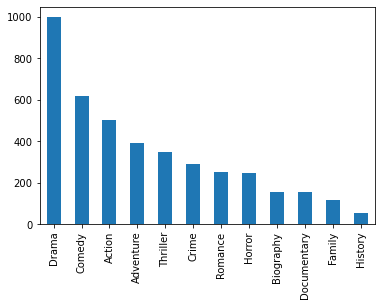

In [12]:
films_top10.genres.value_counts().plot(kind='bar');

---

---

## Analyzing d_pp_ratio by genres

In [29]:
films_dpp = films_top10

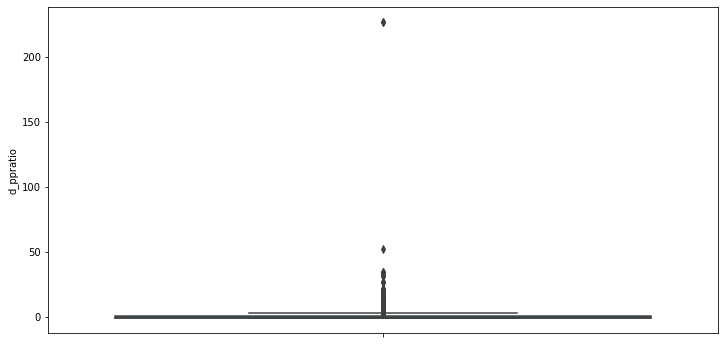

In [30]:
plt.figure(figsize=(12, 6))
sns.boxplot(y='d_ppratio', data=films_dpp);

In [31]:
# IQR method for removing outliers
Q1 = films_dpp.d_ppratio.quantile(0.25)
Q3 = films_dpp.d_ppratio.quantile(0.75)
IQR = Q3 - Q1
films_dpp = films_dpp[~((films_dpp.d_ppratio < (Q1 - 1.5 * IQR)) | (films_dpp.d_ppratio > (Q3 + 1.5 * IQR)))]

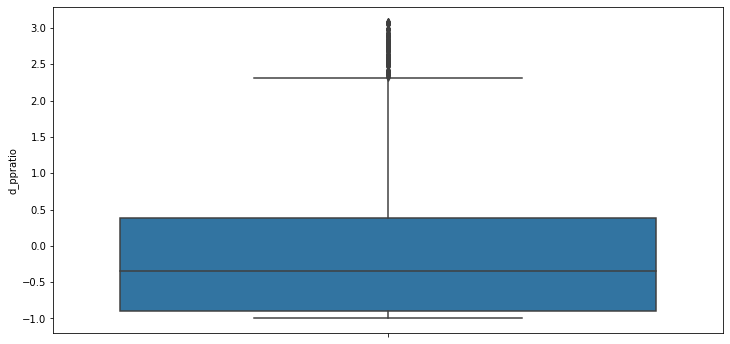

In [32]:
plt.figure(figsize=(12, 6))
sns.boxplot(y='d_ppratio', data=films_dpp);

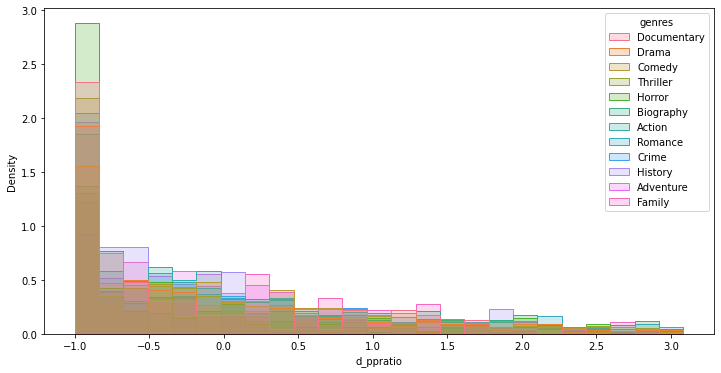

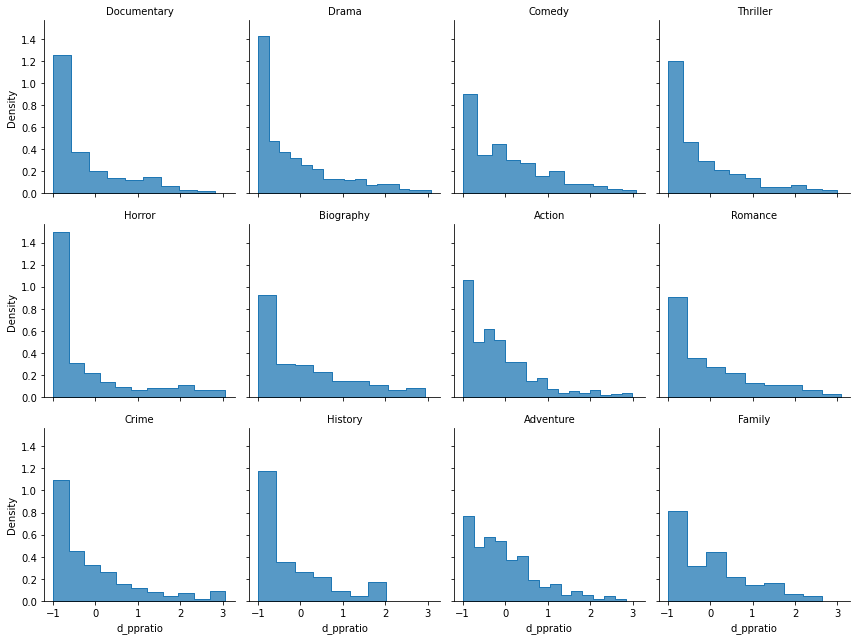

In [33]:
plt.figure(figsize=(12, 6))
sns.histplot(data=films_dpp, x='d_ppratio', hue='genres', element='step', stat='density', common_norm=False)

g = sns.FacetGrid(films_dpp, col='genres', col_wrap=4, sharex=True, sharey=True)
g.map(sns.histplot, 'd_ppratio', element='step', stat='density', common_norm=False)

# Optional: Set the titles and adjust the axis labels
g.set_titles('{col_name}')
g.set_axis_labels('d_ppratio', 'Density')

# Show the plot
plt.show()


In [34]:
films_dpp.groupby('genres').d_ppratio.std()

genres
Action         0.813777
Adventure      0.804849
Biography      1.058417
Comedy         0.963874
Crime          0.989987
Documentary    0.884111
Drama          0.979673
Family         0.895046
History        0.843867
Horror         1.099887
Romance        1.019593
Thriller       0.954869
Name: d_ppratio, dtype: float64

In [35]:
films_dpp.groupby('genres').d_ppratio.count()

genres
Action         486
Adventure      376
Biography      143
Comedy         562
Crime          281
Documentary    139
Drama          913
Family         110
History         53
Horror         202
Romance        218
Thriller       317
Name: d_ppratio, dtype: int64

In [36]:
# Assuming 'data' is a pandas DataFrame with your categories as 'category'
# and the dependent variable as 'y'
H, p_value = stats.kruskal(*[group['d_ppratio'].values for name, group in films_dpp.groupby('genres')])

print('H-statistic:', H)
print('P-value:', p_value)

if p_value < 0.05:
    print("There is a significant difference between the categories.")
else:
    print("There is no significant difference between the categories.")

H-statistic: 70.64762335524881
P-value: 9.199755500240443e-11
There is a significant difference between the categories.


In [37]:
# Assuming 'data' is your DataFrame with 'category' and 'y' columns
mc = MultiComparison(films_dpp['d_ppratio'], films_dpp['genres'])
result = mc.tukeyhsd()
result.summary()
tukey_summary_df = pd.DataFrame(data=result._results_table.data[1:], columns=result._results_table.data[0])

# Filter the DataFrame to only show rows where 'reject' is True
significant_results = tukey_summary_df[tukey_summary_df['reject'] == True]

print(significant_results)

    group1       group2  meandiff   p-adj   lower   upper  reject
31  Comedy  Documentary   -0.3249  0.0152 -0.6176 -0.0321    True
37  Comedy     Thriller   -0.2199  0.0438 -0.4370 -0.0029    True


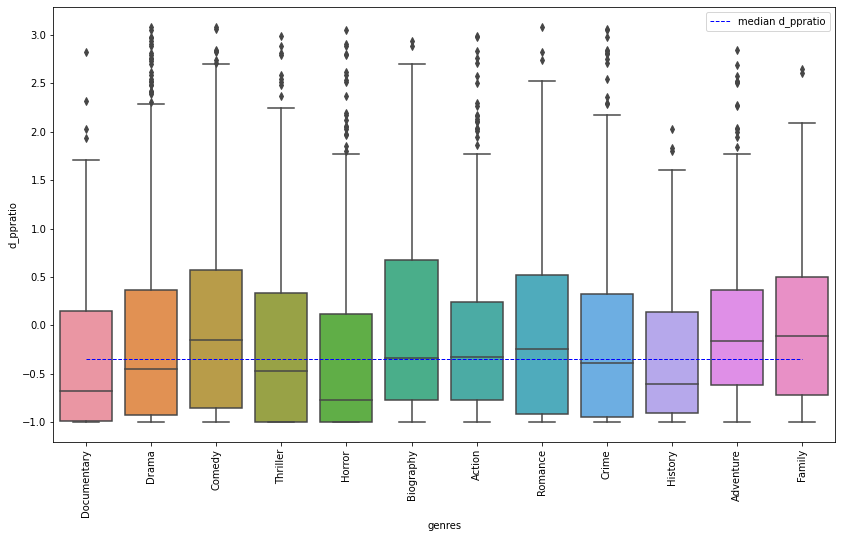

In [38]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='genres', y='d_ppratio', data=films_dpp)
plt.hlines(y=films_dpp.d_ppratio.median(), xmin=0, xmax=11, 
           colors='blue', linestyles='dashed', lw=1, label='median d_ppratio')
plt.legend()
plt.xticks(rotation=90)
plt.show()

---

---

## Analyzing d_netprofit by genres

In [49]:
films_net = films_top10

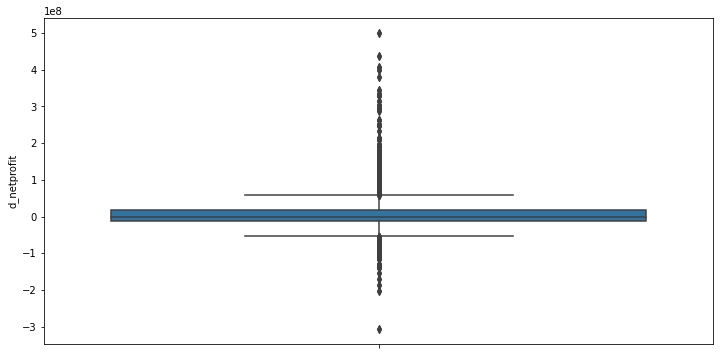

In [50]:
plt.figure(figsize=(12, 6))
sns.boxplot(y='d_netprofit', data=films_net);

In [51]:
# IQR method for removing outliers
Q1 = films_net.d_netprofit.quantile(0.25)
Q3 = films_net.d_netprofit.quantile(0.75)
IQR = Q3 - Q1
films_net = films_net[~((films_net.d_netprofit < (Q1 - 1.5 * IQR)) | (films_net.d_netprofit > (Q3 + 1.5 * IQR)))]

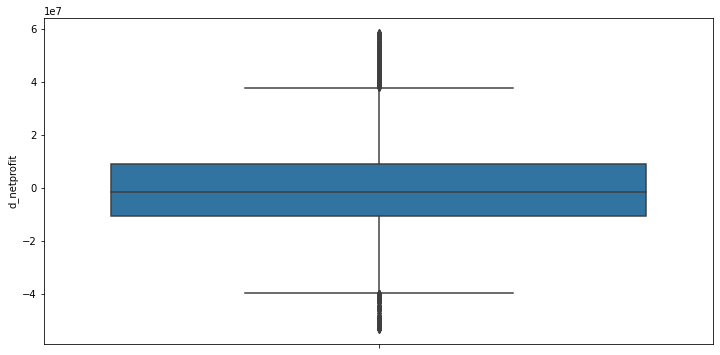

In [52]:
plt.figure(figsize=(12, 6))
sns.boxplot(y='d_netprofit', data=films_net);

In [53]:
# IQR method for removing outliers
Q1 = films_net.d_netprofit.quantile(0.25)
Q3 = films_net.d_netprofit.quantile(0.75)
IQR = Q3 - Q1
films_net = films_net[~((films_net.d_netprofit < (Q1 - 1.5 * IQR)) | (films_net.d_netprofit > (Q3 + 1.5 * IQR)))]

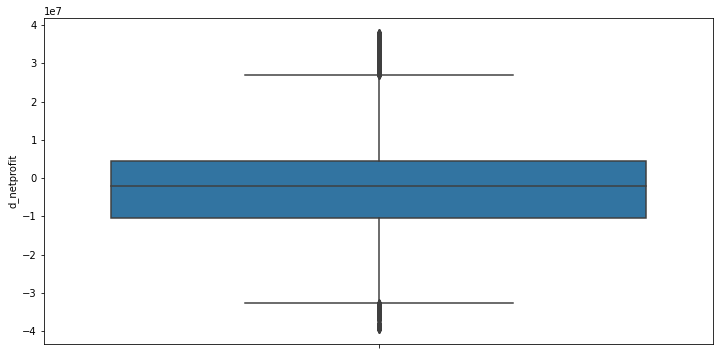

In [54]:
plt.figure(figsize=(12, 6))
sns.boxplot(y='d_netprofit', data=films_net);

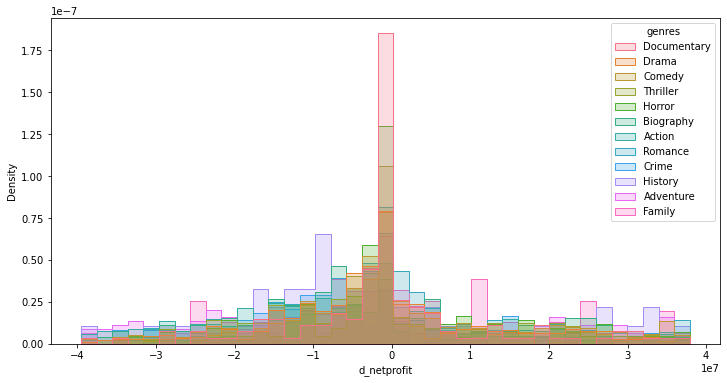

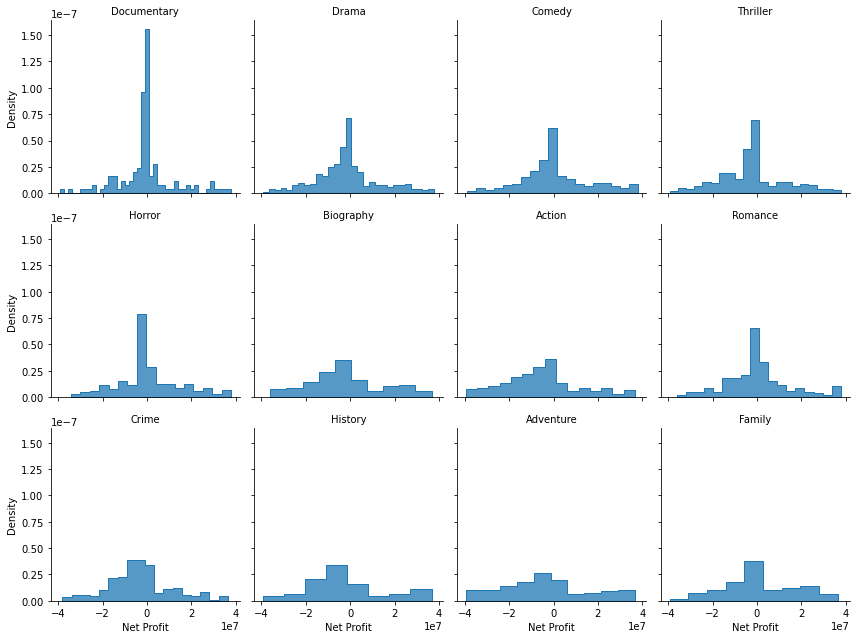

In [55]:
plt.figure(figsize=(12, 6))
sns.histplot(data=films_net, x='d_netprofit', hue='genres', element='step', stat='density', common_norm=False)

g = sns.FacetGrid(films_net, col='genres', col_wrap=4, sharex=True, sharey=True)
g.map(sns.histplot, 'd_netprofit', element='step', stat='density', common_norm=False)

# Optional: Set the titles and adjust the axis labels
g.set_titles('{col_name}')
g.set_axis_labels('Net Profit', 'Density')

# Show the plot
plt.show()


In [57]:
films_net.groupby('genres').d_ppratio.std()

genres
Action          1.496321
Adventure       1.112188
Biography       1.904546
Comedy          1.838510
Crime           1.023190
Documentary     1.702025
Drama           1.986119
Family          0.919409
History         0.826857
Horror         15.891495
Romance         2.449685
Thriller       13.658558
Name: d_ppratio, dtype: float64

In [58]:
films_net.groupby('genres').d_ppratio.count()

genres
Action         334
Adventure      223
Biography      131
Comedy         488
Crime          243
Documentary    136
Drama          856
Family          78
History         46
Horror         213
Romance        210
Thriller       285
Name: d_ppratio, dtype: int64

In [59]:
# Assuming 'data' is a pandas DataFrame with your categories as 'category'
# and the dependent variable as 'y'
H, p_value = stats.kruskal(*[group['d_netprofit'].values for name, group in films_net.groupby('genres')])

print('H-statistic:', H)
print('P-value:', p_value)

if p_value < 0.05:
    print("There is a significant difference between the categories.")
else:
    print("There is no significant difference between the categories.")

H-statistic: 68.48132433008328
P-value: 2.372420935916997e-10
There is a significant difference between the categories.


In [60]:
# Assuming 'data' is your DataFrame with 'category' and 'y' columns
mc = MultiComparison(films_net['d_ppratio'], films_net['genres'])
result = mc.tukeyhsd()
result.summary()
tukey_summary_df = pd.DataFrame(data=result._results_table.data[1:], columns=result._results_table.data[0])

# Filter the DataFrame to only show rows where 'reject' is True
significant_results = tukey_summary_df[tukey_summary_df['reject'] == True]

print(significant_results)

    group1  group2  meandiff   p-adj   lower   upper  reject
8   Action  Horror    1.8803  0.0172  0.1692  3.5914    True
42   Crime  Horror    1.9336  0.0279  0.1020  3.7653    True
53   Drama  Horror    1.5838  0.0267  0.0896  3.0779    True


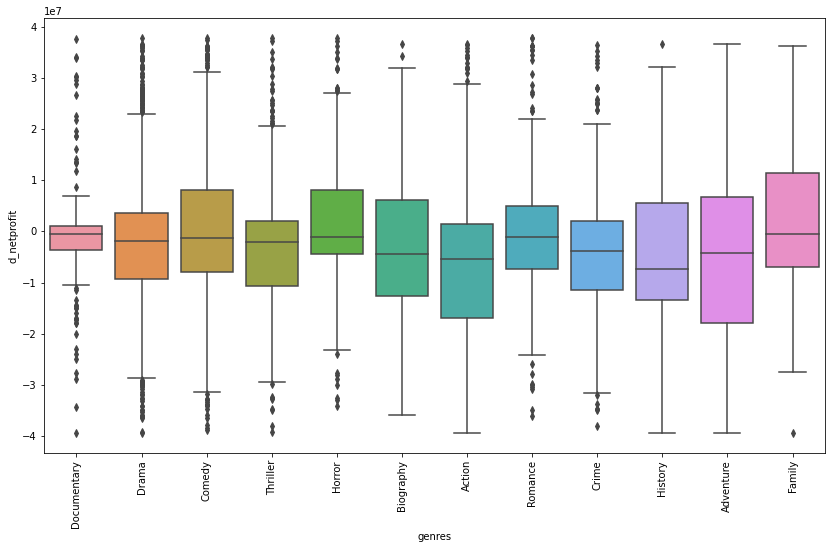

In [61]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='genres', y='d_netprofit', data=films_net)
plt.xticks(rotation=90)
plt.show()

## Main take-aways from this section:

## No significant difference seen in domestic net profit by genre, we should not focus on this variable as a KPI

---

---